#1. Cargar y preparar los datos

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [28]:
uploaded = files.upload()


Saving data_limpio.csv to data_limpio.csv


In [29]:
#cargar los datos
df = pd.read_csv('data_limpio.csv')

In [30]:
# Convertir fehca con formato dia/mes/año
df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y')

# Crear columnas adicionales para el análisis
df['mes'] = df['fecha'].dt.month
df['dia_semana'] = df['fecha'].dt.day_name()

# Verifica la transformación
print(df[['fecha', 'mes', 'dia_semana']].head())

       fecha  mes dia_semana
0 2023-03-01    3  Wednesday
1 2023-04-01    4   Saturday
2 2023-05-02    5    Tuesday
3 2023-01-06    1     Friday
4 2023-01-06    1     Friday


#2. Informacion general

In [46]:
df['droga (kg)'] = df['droga (kg)'].astype('float')
print("Total de registros:", len(df))
print("Fechas:", df['fecha'].min().date(), "a", df['fecha'].max().date())
print("Total nacionales:",  (df['nacionales'] > 0).sum())
print("Total extranjeros:", df['extranjeros'].sum())
print("Eventos con droga:", df['droga (kg)'].sum())
print("Eventos con armas:", (df['armas'] > 0).sum())
print("Eventos con cartucho:", df['cartuchos'].sum())
print("Eventos con cargador:", df['cargadores'].sum())
print("Eventos con dinero:", (df['dinero'] > 0).sum())
print("Tipos de delito:", df['delito'].nunique())


Total de registros: 571
Fechas: 2023-01-06 a 2023-12-30
Total nacionales: 214
Total extranjeros: 252
Eventos con droga: 87.67072
Eventos con armas: 15
Eventos con cartucho: 510
Eventos con cargador: 39
Eventos con dinero: 4
Tipos de delito: 7


#3. Evento por mes

<ipython-input-32-ce371d3543d9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=eventos_mes.index, y=eventos_mes.values, palette="Blues_d")


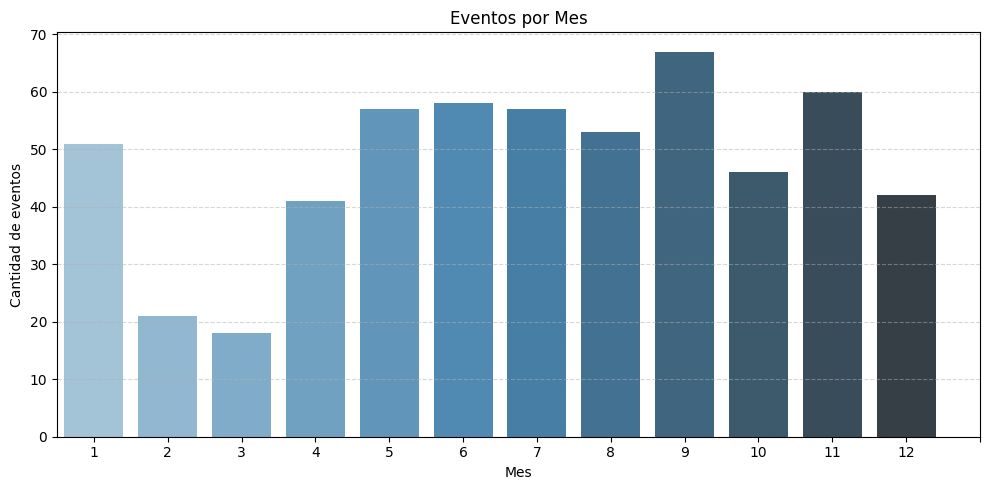

In [32]:
eventos_mes = df['mes'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(x=eventos_mes.index, y=eventos_mes.values, palette="Blues_d")
plt.title("Eventos por Mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de eventos")
plt.xticks(range(0,13))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Observacion**
Podemos ver que septiembre y noviembre son los meses con mas puestas a disposicion del año

#4. Nacionales vs Extranjeros

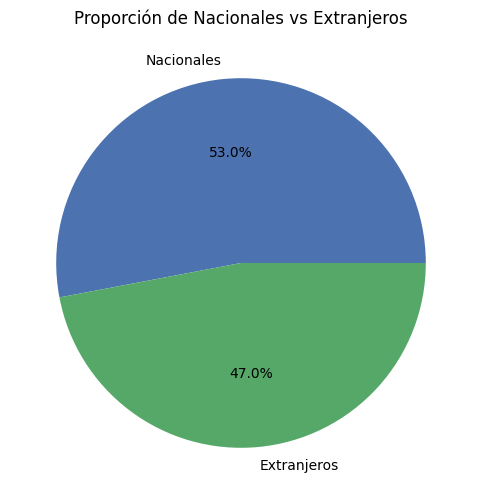

In [33]:
nacionales = df['nacionales'].sum()
extranjeros = df['extranjeros'].sum()

plt.figure(figsize=(6,6))
plt.pie([nacionales, extranjeros], labels=['Nacionales', 'Extranjeros'],
        autopct='%1.1f%%', colors=['#4c72b0', '#55a868'])
plt.title("Proporción de Nacionales vs Extranjeros")
plt.show()


**Observaciones**
Aunque no es mucha la diferencia los nacionales son los que tiene 6% mas de detenciones

#5. Tipos de delitos mas comunes

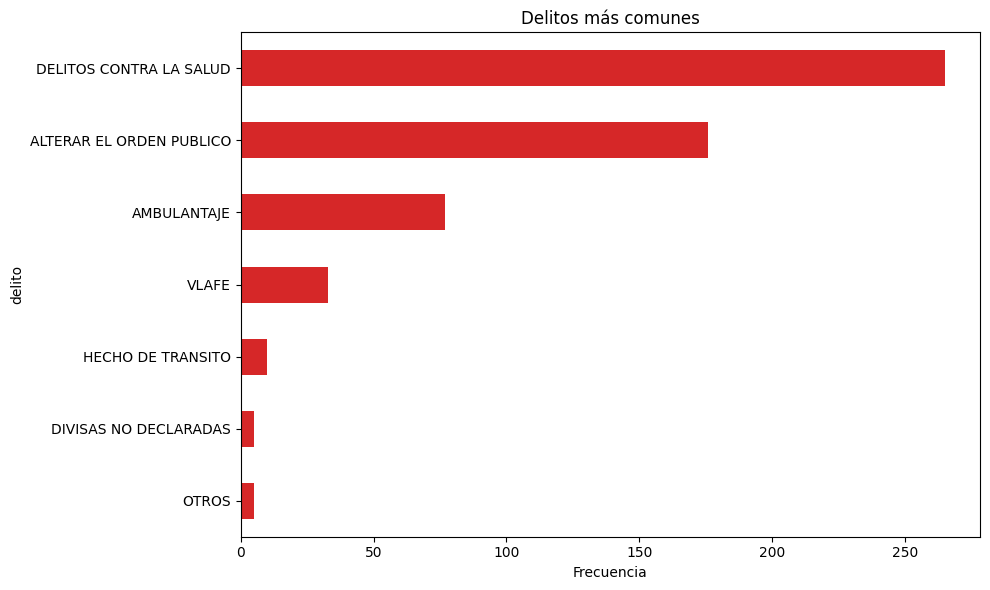

In [48]:
plt.figure(figsize=(10,6))
df['delito'].value_counts().head(10).plot(kind='barh', color="#d62728")
plt.title("Delitos más comunes")
plt.xlabel("Frecuencia")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


**Observaciones**
Los delitos que mas comunmente se comete en el aeropuerto son delitos contra la salud y alterar el orden publico.

#6. Eventos por dia de la semana

<ipython-input-35-6976d87b1b68>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=eventos_dia.index, y=eventos_dia.values, palette="pastel")


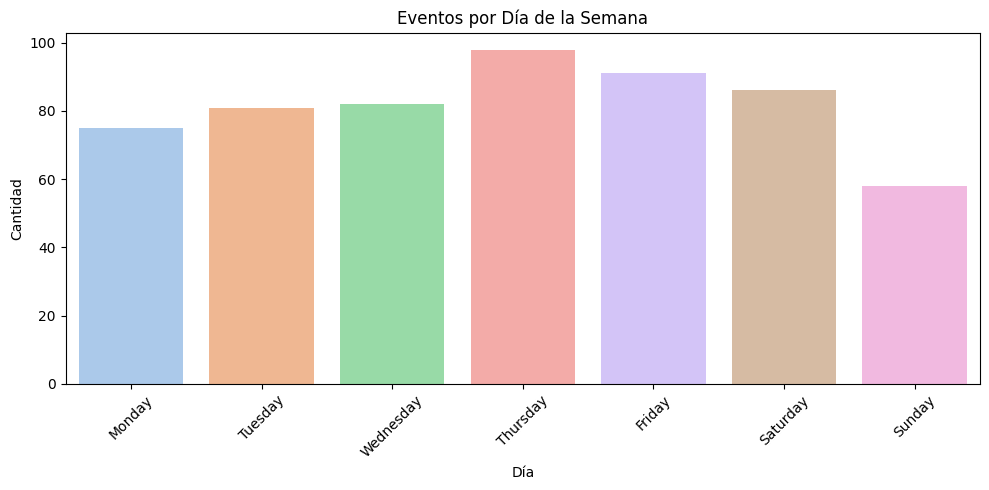

In [35]:
dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
eventos_dia = df['dia_semana'].value_counts().reindex(dias_orden)

plt.figure(figsize=(10,5))
sns.barplot(x=eventos_dia.index, y=eventos_dia.values, palette="pastel")
plt.title("Eventos por Día de la Semana")
plt.xlabel("Día")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Observacion**
Los dias jueves tuvo un poco mas de delitos cometidos.

#7. Eventos con armas, drogas, dinero

<ipython-input-40-cd2efff9b018>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(categorias.keys()), y=list(categorias.values()), palette='muted')


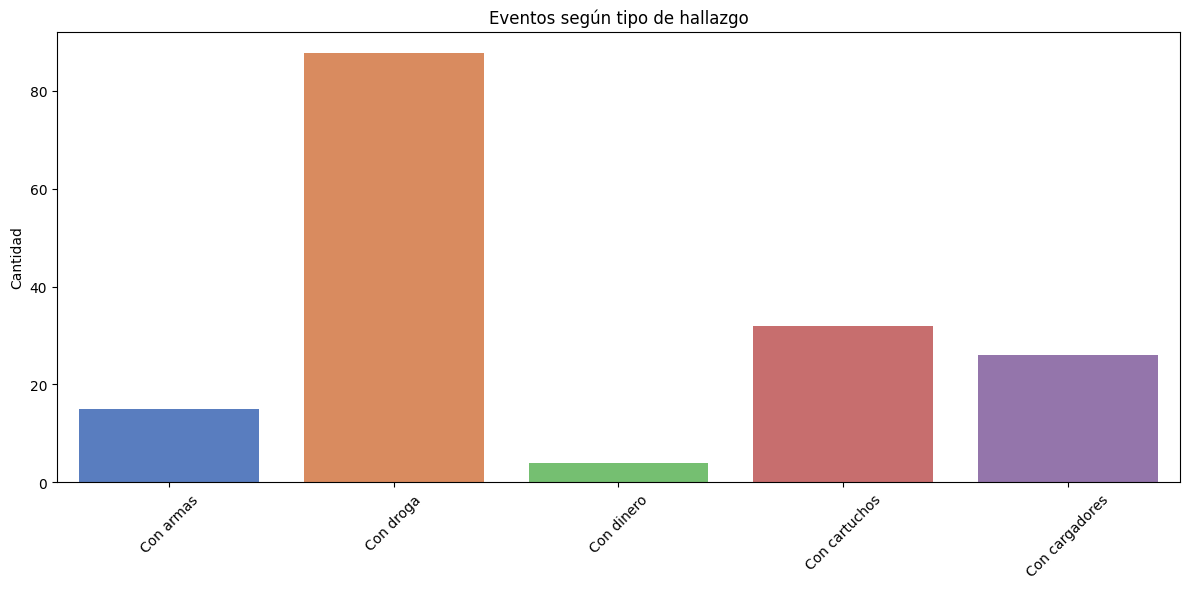

In [40]:
categorias = {
    'Con armas': (df['armas'] > 0).sum(),
    'Con droga': df['droga (kg)'].sum(),
    'Con dinero': (df['dinero'] > 0).sum(),
    'Con cartuchos': (df['cartuchos'] > 0).sum(),
    'Con cargadores': (df['cargadores'] > 0).sum()
}

plt.figure(figsize=(12,6))
sns.barplot(x=list(categorias.keys()), y=list(categorias.values()), palette='muted')
plt.title("Eventos según tipo de hallazgo")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#8. Los delitos que cometen las personas (Extranjeros vs Nacionales)

<ipython-input-41-6976d87b1b68>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=eventos_dia.index, y=eventos_dia.values, palette="pastel")


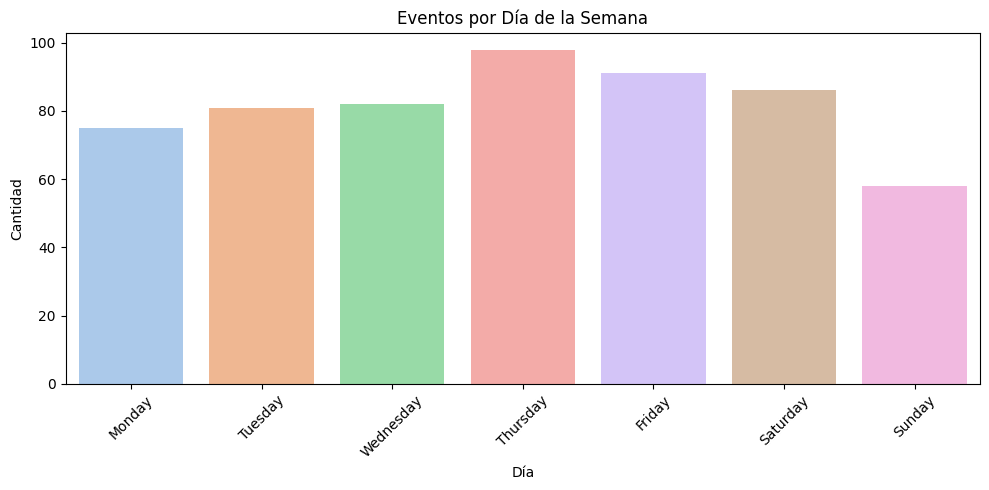

In [41]:
dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
eventos_dia = df['dia_semana'].value_counts().reindex(dias_orden)

plt.figure(figsize=(10,5))
sns.barplot(x=eventos_dia.index, y=eventos_dia.values, palette="pastel")
plt.title("Eventos por Día de la Semana")
plt.xlabel("Día")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
# Agrupar por tipo de delito y sumar cuántos nacionales y extranjeros estuvieron involucrados
delitos_por_nacionalidad = df.groupby('delito')[['nacionales', 'extranjeros']].sum()

# Ordenar por total de personas implicadas
delitos_por_nacionalidad['total'] = delitos_por_nacionalidad['nacionales'] + delitos_por_nacionalidad['extranjeros']
delitos_por_nacionalidad = delitos_por_nacionalidad.sort_values('total', ascending=False)




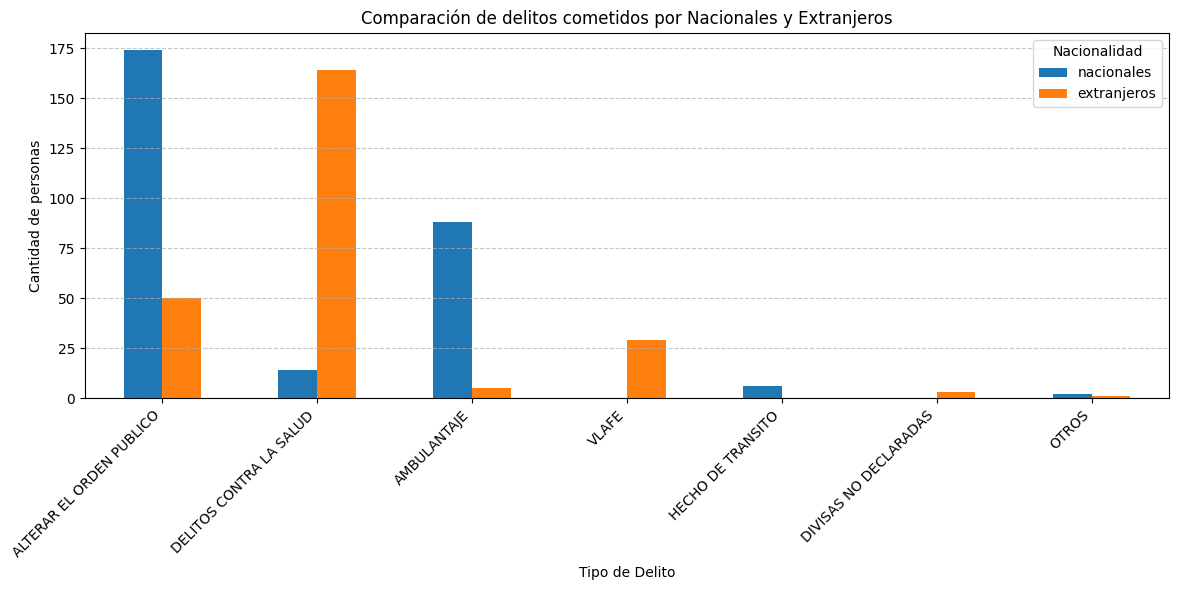

In [43]:
# Seleccionamos los 10 delitos con más casos
top_delitos = delitos_por_nacionalidad.head(7)

# Gráfico de barras comparativo
top_delitos[['nacionales', 'extranjeros']].plot(kind='bar', figsize=(12, 6))
plt.title('Comparación de delitos cometidos por Nacionales y Extranjeros')
plt.xlabel('Tipo de Delito')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Nacionalidad')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Observaciones**
Los extrajeros tienden a cometer delitos como delitos sobre droga mientras que los nacionales tiene mas posibilidad de comerter algun falta administrativa como alterar el orden publico.

In [45]:
df['fecha'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 571 entries, 0 to 570
Series name: fecha
Non-Null Count  Dtype         
--------------  -----         
571 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.6 KB
